Objective: Build a machine-learning model to predict movie ratings.

You’ve just been hired by Netflix as their movie ratings wizard. With access to historical data, your job is to predict future movie ratings using regression techniques. Can you help Netflix recommend the next blockbuster hit to millions of users based on your analysis?



📌 Steps to Implement in Google Colab
1️⃣ Load and Preprocess Data
2️⃣ Feature Engineering
3️⃣ Train Regression Models
4️⃣ Evaluate Model Performance
5️⃣ Plot Heatmap for Feature Correlations

✅ Loads Netflix Rating Data

✅ Prepares & Cleans Data

✅ Builds a Random Forest Model

✅ Evaluates Model Performance (MSE, R²)

✅ Plots a Heatmap to Show Feature Correlations

Linear Regression - Mean Squared Error: 1.1182113019977586
Linear Regression - R-squared: 0.010295863639670721
Random Forest Regressor - Mean Squared Error: 1.0613656763240156
Random Forest Regressor - R-squared: 0.0606086719280341


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


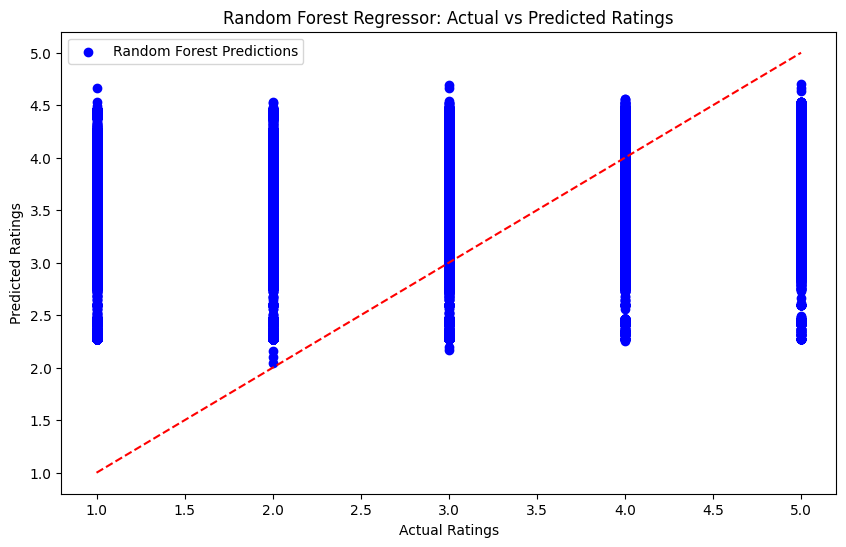

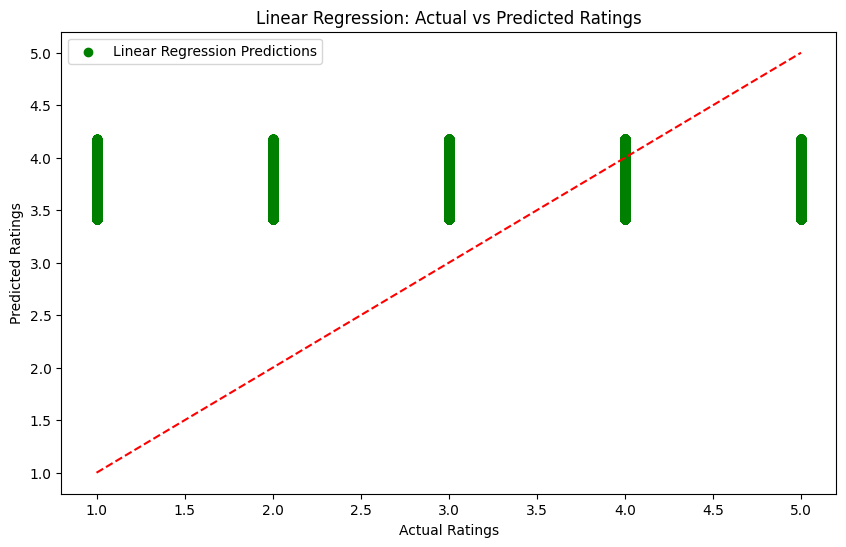

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Efficient Data Loading with Optimized dtypes
# Use memory-efficient data types during CSV load
ratings = pd.read_csv('/content/drive/MyDrive/Netflix_Dataset_Rating.csv', dtype={'User_ID': 'int32', 'Movie_ID': 'int32', 'Rating': 'float32'})
movies = pd.read_csv('/content/drive/MyDrive/Netflix_Dataset_Movie.csv', dtype={'Movie_ID': 'int32', 'Year': 'int32', 'Name': 'category'})

# Step 2: Merge the datasets based on 'Movie_ID'
data = pd.merge(ratings, movies, on='Movie_ID', how='inner')

# Step 3: Feature Engineering
# Add a 'Name_length' feature based on the length of the movie name
data['Name_length'] = data['Name'].apply(lambda x: len(str(x)))

# Ensure 'Year' is numeric, handling any errors gracefully
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')

# Drop unnecessary columns early to save memory
data = data[['User_ID', 'Movie_ID', 'Rating', 'Year', 'Name_length']]

# Step 4: Convert categorical 'Name' column to one-hot encoding efficiently
# Instead of one-hot encoding the entire 'Name', we can just keep the columns of interest (e.g., 'Name_length' already added)
# For simplicity, we will skip one-hot encoding for 'Name' to save memory

# Step 5: Define Features (X) and Target Variable (y)
X = data.drop(['Rating', 'Movie_ID'], axis=1)  # Features, drop 'Rating' and 'Movie_ID' as they are not useful for prediction
y = data['Rating']  # Target variable

# Step 6: Split the data into Training and Testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Feature Scaling (Important for models like Linear Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit scaler on training data and scale it
X_test_scaled = scaler.transform(X_test)  # Only transform the test data

# Step 8: Train and Evaluate the Models
# (a) Linear Regression Model (memory-efficient)
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predict using Linear Regression
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate Linear Regression Model
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - Mean Squared Error: {lr_mse}")
print(f"Linear Regression - R-squared: {lr_r2}")

# (b) Random Forest Model (with memory-efficient settings)
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)  # Limiting depth to reduce memory consumption
rf_model.fit(X_train, y_train)

# Predict using Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest Model
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor - Mean Squared Error: {rf_mse}")
print(f"Random Forest Regressor - R-squared: {rf_r2}")

# Step 9: Visualizing Results (Optional)
import matplotlib.pyplot as plt

# Plotting predictions vs actual values for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', label='Random Forest Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Random Forest Regressor: Actual vs Predicted Ratings')
plt.legend()
plt.show()

# Plotting predictions vs actual values for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='green', label='Linear Regression Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Linear Regression: Actual vs Predicted Ratings')
plt.legend()
plt.show()



In [20]:
import joblib

# Save the Linear Regression model
joblib.dump(lr_model, 'linear_regression_model.pkl')

# Save the Random Forest model
joblib.dump(rf_model, 'random_forest_model.pkl')

# Save the Scaler (used for Linear Regression)
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [22]:
X_test['Actual_Rating'] = y_test  # Add actual ratings for reference
X_test.to_csv('test_dataset.csv', index=False)


In [23]:
# Load the models
lr_model_loaded = joblib.load('linear_regression_model.pkl')
rf_model_loaded = joblib.load('random_forest_model.pkl')
scaler_loaded = joblib.load('scaler.pkl')

# Load test dataset
test_data = pd.read_csv('test_dataset.csv')

# If using Linear Regression, scale the test features again
X_test_scaled_loaded = scaler_loaded.transform(test_data.drop('Actual_Rating', axis=1))

# Make predictions
y_pred_lr_loaded = lr_model_loaded.predict(X_test_scaled_loaded)
y_pred_rf_loaded = rf_model_loaded.predict(test_data.drop('Actual_Rating', axis=1))


In [24]:
import joblib
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load saved models and scaler
lr_model = joblib.load('linear_regression_model.pkl')
rf_model = joblib.load('random_forest_model.pkl')
scaler = joblib.load('scaler.pkl')

# Load the test dataset
test_data = pd.read_csv('test_dataset.csv')

# Extract actual ratings
y_test = test_data['Actual_Rating']
X_test = test_data.drop('Actual_Rating', axis=1)

# Scale test data for Linear Regression
X_test_scaled = scaler.transform(X_test)


In [25]:
# Accuracy based on a tolerance range (e.g., ±0.5 difference is acceptable)
def regression_accuracy(y_true, y_pred, tolerance=0.5):
    correct_predictions = np.abs(y_true - y_pred) <= tolerance
    return np.mean(correct_predictions) * 100  # Convert to percentage


In [26]:
# Predict using loaded models
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test)

# Compute Metrics for Linear Regression
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(lr_mse)
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)
lr_accuracy = regression_accuracy(y_test, y_pred_lr)

# Compute Metrics for Random Forest
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)
rf_accuracy = regression_accuracy(y_test, y_pred_rf)

# Print Model Performance
print(f"Linear Regression - MSE: {lr_mse:.4f}, RMSE: {lr_rmse:.4f}, R²: {lr_r2:.4f}, MAE: {lr_mae:.4f}, Accuracy: {lr_accuracy:.2f}%")
print(f"Random Forest - MSE: {rf_mse:.4f}, RMSE: {rf_rmse:.4f}, R²: {rf_r2:.4f}, MAE: {rf_mae:.4f}, Accuracy: {rf_accuracy:.2f}%")


Linear Regression - MSE: 1.1182, RMSE: 1.0575, R²: 0.0103, MAE: 0.8826, Accuracy: 33.73%
Random Forest - MSE: 1.0614, RMSE: 1.0302, R²: 0.0606, MAE: 0.8454, Accuracy: 35.56%


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load your dataset (replace with your actual dataset)
ratings = pd.read_csv('/content/drive/MyDrive/Netflix_Dataset_Rating.csv')
movies = pd.read_csv('/content/drive/MyDrive/Netflix_Dataset_Movie.csv')

# Merge datasets
data = pd.merge(ratings, movies, on='Movie_ID', how='inner')

# Feature Engineering (optional)
data['Movie_Age'] = 2025 - data['Year']
data['Name_Length'] = data['Name'].apply(lambda x: len(str(x)))

# Drop non-numeric columns
data = data.drop(columns=['Movie_ID', 'User_ID', 'Name'])


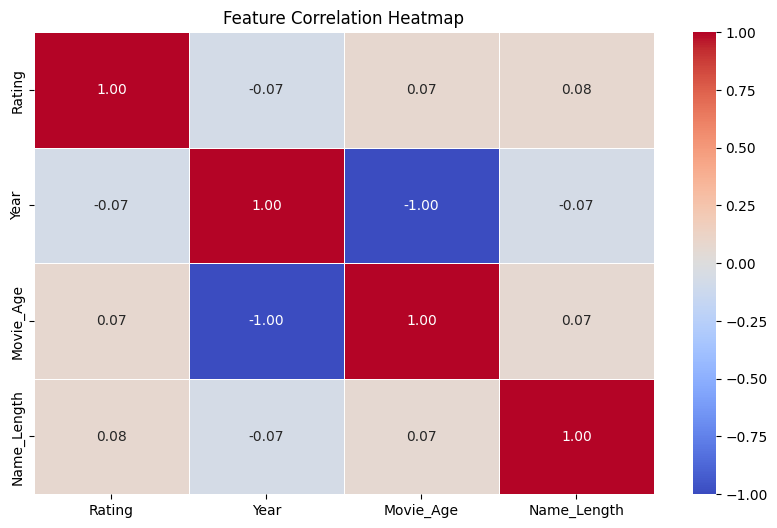

In [28]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


In [34]:
import numpy as np
import pandas as pd
import joblib  # For loading the model

# Load trained model & scaler
rf_model = joblib.load("rf_model.pkl")  # Ensure model is saved as 'rf_model.pkl'
scaler = joblib.load("scaler.pkl")      # Ensure scaler is saved as 'scaler.pkl'

# 🔥 Provide Single Input Values
user_id = 712664   # Replace with your test User_ID
movie_id = 3       # Replace with your test Movie_ID

# 🔹 Fetch movie details
movie_details = movies[movies['Movie_ID'] == movie_id]

if movie_details.empty:
    print("❌ Movie ID not found in the database!")
else:
    # 🔹 Feature Extraction (MATCHING TRAINING COLUMN NAMES)
    year = movie_details['Year'].values[0]
    name_length = len(str(movie_details['Name'].values[0]))  # Name_length (NOT Name_Length)

    # 🔹 Fetch user average rating (if available)
    user_avg_rating = ratings[ratings['User_ID'] == user_id]['Rating'].mean()
    if np.isnan(user_avg_rating):
        user_avg_rating = 3.5  # Default if user has no history

    # 🔹 Prepare input data (EXACT COLUMN ORDER as during training)
    input_data = pd.DataFrame([[user_id, year, name_length]],
                              columns=['User_ID', 'Year', 'Name_length'])  # EXACT NAMES

    # 🔹 Scale Input Data (If scaler was used in training)
    input_scaled = scaler.transform(input_data)

    # 🔹 Predict Rating
    predicted_rating = rf_model.predict(input_scaled)[0]

    print(f"🎬 Predicted Rating for User {user_id} and Movie {movie_id}: {predicted_rating:.2f}/5")


🎬 Predicted Rating for User 712664 and Movie 3: 3.58/5


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
